# Iris Keras

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
import tensorflow
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0



## Keras

In [4]:
from ibex.tensorflow.contrib.keras.wrappers.scikit_learn import KerasClassifier as PdKerasClassifier

In [9]:
def buid_nn():
    np.random.seed(7)
    model = tensorflow.contrib.keras.models.Sequential()
    model.add(tensorflow.contrib.keras.layers.Dense(8, input_dim=4, activation='relu'))
    model.add(tensorflow.contrib.keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

buid_nn()

In [11]:
estimator = PdKerasClassifier(build_fn=buid_nn, classes=iris['class'].unique())

In [13]:
estimator.fit(iris[features], iris['class']).predict(iris[features])

Epoch 1/10
150/150 [==============================] - 0s - loss: 1.6038 - acc: 0.1000     
Epoch 2/10
150/150 [==============================] - 0s - loss: 1.5499 - acc: 0.2400     
Epoch 3/10
150/150 [==============================] - 0s - loss: 1.4961 - acc: 0.2733     
Epoch 4/10
150/150 [==============================] - 0s - loss: 1.4514 - acc: 0.3200     
Epoch 5/10
150/150 [==============================] - 0s - loss: 1.4094 - acc: 0.3333     
Epoch 6/10
150/150 [==============================] - 0s - loss: 1.3679 - acc: 0.3400     
Epoch 7/10
150/150 [==============================] - 0s - loss: 1.3318 - acc: 0.3400     
Epoch 8/10
150/150 [==============================] - 0s - loss: 1.2973 - acc: 0.3400     
Epoch 9/10
150/150 [==============================] - 0s - loss: 1.2649 - acc: 0.3400     
Epoch 10/10
150/150 [==============================] - 0s - loss: 1.2353 - acc: 0.3333     


0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
6      2.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     2.0
14     2.0
15     2.0
16     2.0
17     2.0
18     2.0
19     2.0
20     2.0
21     2.0
22     2.0
23     2.0
24     2.0
25     2.0
26     2.0
27     2.0
28     2.0
29     2.0
      ... 
120    1.0
121    1.0
122    1.0
123    1.0
124    1.0
125    1.0
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
141    1.0
142    1.0
143    1.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Length: 150, dtype: float64

In [25]:
PYTHONHASHSEED=0
numpy.random.seed(7)

estimator.fit(X, y)
estimator.score(X, y)

0.98000000119209285

In [18]:
kfold = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, iris[features], iris['class'], cv=kfold)
scores

Epoch 1/10
135/135 [==============================] - 0s - loss: 1.8843 - acc: 0.3481     
Epoch 2/10
135/135 [==============================] - 0s - loss: 1.7468 - acc: 0.3481     
Epoch 3/10
135/135 [==============================] - 0s - loss: 1.6389 - acc: 0.3481     
Epoch 4/10
135/135 [==============================] - 0s - loss: 1.5685 - acc: 0.2741     
Epoch 5/10
135/135 [==============================] - 0s - loss: 1.5191 - acc: 0.1852     
Epoch 6/10
135/135 [==============================] - 0s - loss: 1.4927 - acc: 0.1333     
Epoch 7/10
135/135 [==============================] - 0s - loss: 1.4693 - acc: 0.1333     
Epoch 8/10
135/135 [==============================] - 0s - loss: 1.4475 - acc: 0.1407     
Epoch 9/10
135/135 [==============================] - 0s - loss: 1.4234 - acc: 0.1333     
Epoch 10/10
15/15 [==============================] - 0s
Epoch 1/10
135/135 [==============================] - 0s - loss: 2.4563 - acc: 0.3333     
Epoch 2/10
135/135 [==============

135/135 [==============================] - 0s - loss: 1.2810 - acc: 0.5259     
Epoch 8/10
135/135 [==============================] - 0s - loss: 1.2189 - acc: 0.6148     
Epoch 9/10
135/135 [==============================] - 0s - loss: 1.1612 - acc: 0.6519     
Epoch 10/10
15/15 [==============================] - 0s
Epoch 1/10
135/135 [==============================] - 0s - loss: 2.0346 - acc: 0.3111     
Epoch 2/10
135/135 [==============================] - 0s - loss: 1.9714 - acc: 0.3111     
Epoch 3/10
135/135 [==============================] - 0s - loss: 1.9063 - acc: 0.3111     
Epoch 4/10
135/135 [==============================] - 0s - loss: 1.8422 - acc: 0.3111     
Epoch 5/10
135/135 [==============================] - 0s - loss: 1.7839 - acc: 0.3111     
Epoch 6/10
135/135 [==============================] - 0s - loss: 1.7251 - acc: 0.3111     
Epoch 7/10
135/135 [==============================] - 0s - loss: 1.6709 - acc: 0.3111     
Epoch 8/10
135/135 [=========================

array([ 1.45057869,  2.00121045,  0.95330632,  1.41187358,  0.92541403,
        1.13832116,  0.89555472,  1.02811551,  0.87241393,  1.16269815])

In [19]:
np.mean(scores)

1.1839486539363862

Now that all the data is in a ``DataFrame``, we can use the ``feature_importances_`` attribute of a gradient boosting classifier. Note that in Ibex, this is a ``pandas.Series``.

In [3]:
pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_

sepal length (cm)    0.078549
sepal width (cm)     0.104726
petal length (cm)    0.295431
petal width (cm)     0.447961
dtype: float64

Since the result is a ``Series``, we can use its ``plot`` method directly, and it will handle all labels for us.

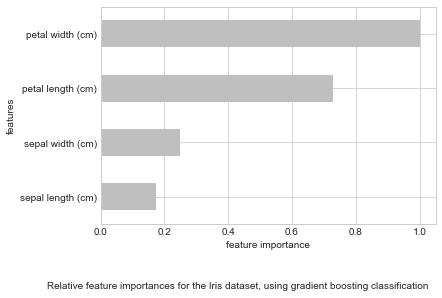

In [4]:
importances = pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_
(importances / importances.max()).plot(kind='barh', color='0.75');
xlabel('feature importance');
ylabel('features');
figtext(
    0, 
    -0.1, 
    'Relative feature importances for the Iris dataset, using gradient boosting classification');